In [0]:
import numpy as np

In [10]:
!nvidia-smi

Mon Feb 10 15:07:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
'''
6-21简单RNN的Numpy实现
'''
#输入序列的时间步数
timesteps = 100
#输入特征空间的维度
input_features = 32
#输出特征空间的维度
output_features = 64
#输入数据：随机噪声
inputs = np.random.random((timesteps, input_features))
#初始状态：全零向量
state_t = np.zeros((output_features))
#创建随机的权重矩阵
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
#input_t是形状为(input_features,)的向量
for input_t in inputs:
  #由输入和当前状态(前一个输出)计算得到当前输出
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  #将这输出保存到一个列表中
  successive_outputs.append(output_t)
  #更新网络的状态，用于下一个时间步
  state_t = output_t
  #最终输出的形状为(timesteps, output_features)的二维张量
  final_output_sequence = np.stack(successive_outputs, axis=0)

In [0]:
final_output_sequence

array([[0.99999962, 0.99999989, 0.99999828, ..., 0.99998638, 0.99999999,
        0.99999938],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [1]:
'''
6-22准备IMDB数据
'''
from keras.datasets import imdb
from keras.preprocessing import sequence

#作为特征的单词个数
max_features = 10000
#在这么多单次之后截断文本(这些单词都属于前max_features个最常见的单词))
maxlen = 500
batch_size = 32
#处理数据
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
len(input_train)

25000

In [0]:
len(input_test)

25000

In [0]:
input_train.shape

(25000, 500)

In [0]:
input_test.shape

(25000, 500)

In [0]:
'''
6-23用Embedding层和SimpleRNN层来训练模型
'''
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
           epochs=10,
           batch_size=128,
           validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 50s 3ms/step - loss: 0.6404 - acc: 0.6230 - val_loss: 0.4767 - val_acc: 0.8218
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.3883 - acc: 0.8392 - val_loss: 0.3707 - val_acc: 0.8440
Epoch 3/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2774 - acc: 0.8879 - val_loss: 0.4064 - val_acc: 0.8486
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2084 - acc: 0.9214 - val_loss: 0.3712 - val_acc: 0.8662
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1465 - acc: 0.9466 - val_loss: 0.4258 - val_acc: 0.8268
Epoch 6/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.0897 - acc: 0.9697 - val_loss: 0.5255 - val_acc: 0.8242
Epoch 7/10
20000/20000 [=

In [0]:
from keras.layers import Dense

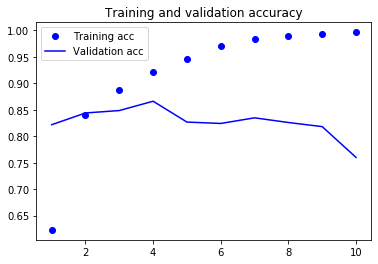

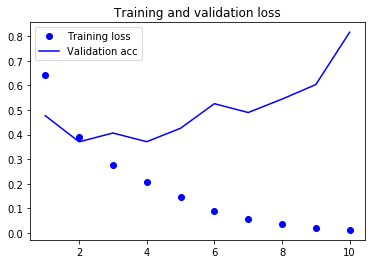

In [0]:
'''
6-24绘制结果
'''
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#绘制
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
'''
6-27 使用Keras中的LSTM层
'''
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 83s 4ms/step - loss: 0.5171 - acc: 0.7494 - val_loss: 0.3727 - val_acc: 0.8426
Epoch 2/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.3096 - acc: 0.8781 - val_loss: 0.3431 - val_acc: 0.8550
Epoch 3/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2449 - acc: 0.9089 - val_loss: 0.2973 - val_acc: 0.8830
Epoch 4/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2001 - acc: 0.9262 - val_loss: 0.3340 - val_acc: 0.8826
Epoch 5/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1861 - acc: 0.9311 - val_loss: 0.3235 - val_acc: 0.8618
Epoch 6/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1584 - acc: 0.9437 - val_loss: 0.5807 - val_acc: 0.8284
Epoch 7/10
20000/20000 

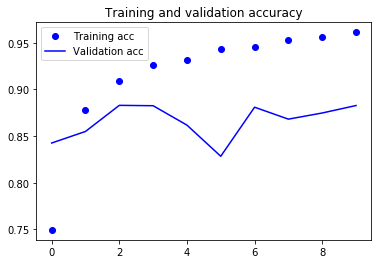

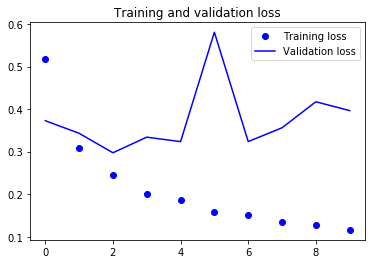

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()